In [17]:
import pandas as pd
import os
import parse
import matplotlib.pyplot as plt
import numpy as np

In [18]:
###Read in CSV###
fulldf = pd.read_csv ('C197.csv')
#####Select what stage you want to examine#####
# C269training = fulldf[fulldf.experiment == '2ac-config-segmented-100-set1-invertedNo-centerNo']
#C269preprobe = fulldf[fulldf.experiment == '2ac-preprobe-snr70_35-set1-invertedNo'].reset_index()
#C269probe = fulldf[fulldf.experiment == '2ac-probe-snr70_35_-10-set1-invertedNo'].reset_index()

#C235training = fulldf[fulldf.experiment == '2ac-training-snr70-set0-invertedYes']

# C280training = fulldf[fulldf.experiment == '2ac-training-snr70-set1-invertedNo']
# C280preprobe = fulldf[fulldf.experiment == '2ac-preprobe-snr70_35-set1-invertedNo'].reset_index()
#C280probe = fulldf[fulldf.experiment == '2ac-probe-snr70_35_-10-set1-invertedNo'].reset_index()

# C291pretrain =  fulldf[fulldf.experiment == '2ac-pretrain-setAll-invertedNo']
#C291training = fulldf[fulldf.experiment == '2ac-training-snr70-set0-invertedNo']
#C291preprobe = fulldf[fulldf.experiment == '2ac-preprobe-snr70_35-set0-invertedNo']
#C291probe = fulldf[fulldf.experiment == '2ac-probe-snr70_35_-10-set0-invertedNo'].reset_index()

# C293pretrain =  fulldf[fulldf.experiment == '2ac-pretrain-setAll-invertedYes']
#C293training = fulldf[fulldf.experiment == '2ac-training-snr70-set0-invertedYes']
#C293preprobe = fulldf[fulldf.experiment == '2ac-preprobe-snr70_35-set0-invertedYes']
#C293probe = fulldf[fulldf.experiment == '2ac-probe-snr70_35_-10-set0-invertedYes'].reset_index()

#C294pretrain =  fulldf[fulldf.experiment == '2ac-pretrain-setAll-invertedNo']
#C294training = fulldf[fulldf.experiment == '2ac-training-snr70-set0-invertedNo']
#C294preprobe= fulldf[fulldf.experiment == '2ac-preprobe-snr70_35-set0-invertedNo'].reset_index()
#C294probe = fulldf[fulldf.experiment == '2ac-probe-snr70_35_-10-set0-invertedNo'].reset_index()

# C250pretrain = fulldf[(fulldf.experiment == '2ac-shaping-setAll-invertedYes') | (fulldf.experiment == '2ac-shaping-setAll-invertedYes-centerNo')]

#C150pretrain = fulldf[fulldf.experiment == '2ac-pretrain-setAll-invertedNo']

#C127pretrain = fulldf[fulldf.experiment == '2ac-pretrain-setAll-invertedNo']
#C127training = fulldf[fulldf.experiment == '2ac-training-snr70-set0-invertedYes']

#C152pretrain = fulldf[fulldf.experiment == '2ac-pretrain-setAll-invertedYes']
#C152training = fulldf[fulldf.experiment == '2ac-training-snr70-set1-invertedYes']
#C152preprobe= fulldf[fulldf.experiment == '2ac-preprobe-snr70_35-set1-invertedYes'].reset_index()

#C193pretrain = fulldf[fulldf.experiment == '2ac-pretrain-setAll-invertedYes']
# C193training = fulldf[fulldf.experiment == '2ac-training-snr70-set1-invertedYes']

#C191pretrain = fulldf[fulldf.experiment == '2ac-pretrain-setAll-invertedNo']
#C191training = fulldf[fulldf.experiment == '2ac-training-snr70-set1-invertedNo']

C197pretrain = fulldf[fulldf.experiment == 
print(C191training.head())
len(C191training)

       addr name subject                              time      rtime  trial  \
0  beagle-4  gng    C191  2023-10-16T16:16:05.535583-04:00   137413.0   3283   
1  beagle-4  gng    C191  2023-10-16T16:15:32.926431-04:00  1520713.0   3282   
2  beagle-4  gng    C191  2023-10-16T16:03:04.148784-04:00   729145.0   3281   
3  beagle-4  gng    C191  2023-10-16T16:01:49.710993-04:00   478764.0   3280   
4  beagle-4  gng    C191  2023-10-16T16:01:37.478962-04:00   972957.0   3279   

  result  correct    response                   stimulus  correction  \
0   feed     True   peck_left  jkexyrd5-30_btwmt59w5-100           0   
1   feed     True  peck_right  c95zqjxq-30_btwmt59w3-100           0   
2   feed     True   peck_left  9ex2k0dy-30_btwmt59w5-100           0   
3   feed     True   peck_left  jkexyrd5-30_btwmt59w4-100           0   
4   feed     True   peck_left  jkexyrd5-30_btwmt59w2-100           0   

                           experiment lights  
0  2ac-training-snr70-set1-invertedNo  

6827

In [19]:
###Remove unneccessary columns###
data = C191training[C191training['lights'].isna()]
smalldf = data[['subject','correct','response','stimulus', 'correction', 'time']]
print (len(smalldf))
print(smalldf['stimulus'])

3684
0       jkexyrd5-30_btwmt59w5-100
1       c95zqjxq-30_btwmt59w3-100
2       9ex2k0dy-30_btwmt59w5-100
3       jkexyrd5-30_btwmt59w4-100
4       jkexyrd5-30_btwmt59w2-100
                  ...            
6666    c95zqjxq-30_btwmt59w2-100
6676    jkexyrd5-30_btwmt59w4-100
6727    jkexyrd5-30_btwmt59w1-100
6775    jkexyrd5-30_btwmt59w5-100
6826    c95zqjxq-30_btwmt59w3-100
Name: stimulus, Length: 3684, dtype: object


In [20]:
###Separate stimulus out into foreground, foreground sound level, background, background sound level, and the SNR###
SNRdict = smalldf
motif = []
background = []
sdB = []
snl = []
SNR = []

def parse_stimuli (stimulus):
    stimulus_parser = parse.compile("{foreground}-{sdB:d}_{background}-{snl:d}")
    parse_result = stimulus_parser.parse(stimulus)
    singlemotif = parse_result.named['foreground']
    background = parse_result.named['background']
    sdB = parse_result.named['sdB']
    snl = parse_result.named['snl']
    SNR = snl - sdB
    return singlemotif, sdB, background, snl, SNR

for i in SNRdict['stimulus']:
    info = list(parse_stimuli(i))
    motif.append(info[0])
    sdB.append(info[1])
    background.append(info[2])
    snl.append(info[3])
    SNR.append(info[4])

SNRdict['Motif'] = motif
SNRdict['sdB'] = sdB
SNRdict['Background'] = background
SNRdict['snl'] = snl
SNRdict['SNR'] = SNR

print (SNRdict.head())
print (SNRdict.shape)

  subject  correct    response                   stimulus  correction  \
0    C191     True   peck_left  jkexyrd5-30_btwmt59w5-100           0   
1    C191     True  peck_right  c95zqjxq-30_btwmt59w3-100           0   
2    C191     True   peck_left  9ex2k0dy-30_btwmt59w5-100           0   
3    C191     True   peck_left  jkexyrd5-30_btwmt59w4-100           0   
4    C191     True   peck_left  jkexyrd5-30_btwmt59w2-100           0   

                               time     Motif  sdB Background  snl  SNR  
0  2023-10-16T16:16:05.535583-04:00  jkexyrd5   30  btwmt59w5  100   70  
1  2023-10-16T16:15:32.926431-04:00  c95zqjxq   30  btwmt59w3  100   70  
2  2023-10-16T16:03:04.148784-04:00  9ex2k0dy   30  btwmt59w5  100   70  
3  2023-10-16T16:01:49.710993-04:00  jkexyrd5   30  btwmt59w4  100   70  
4  2023-10-16T16:01:37.478962-04:00  jkexyrd5   30  btwmt59w2  100   70  
(3684, 11)


/tmp/ipykernel_211961/1420101489.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SNRdict['Motif'] = motif
/tmp/ipykernel_211961/1420101489.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SNRdict['sdB'] = sdB
/tmp/ipykernel_211961/1420101489.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

In [6]:
###Separate stimulus for PRETRAIN out into foreground, foreground sound level, background, background sound level, and the SNR###
SNRdict = smalldf
motif = []
sdB = []
SNR = []

def parse_stimuli (stimulus):
    stimulus_parser = parse.compile("{foreground}_{sdB:d}")
    parse_result = stimulus_parser.parse(stimulus)
    singlemotif = parse_result.named['foreground']
    sdB = parse_result.named['sdB']
    SNR = 70
    return singlemotif, sdB, SNR

for i in SNRdict['stimulus']:
    info = list(parse_stimuli(i))
    motif.append(info[0])
    sdB.append(info[1])
    SNR.append(info[2])

SNRdict['Motif'] = motif
SNRdict['sdB'] = sdB
SNRdict['SNR'] = SNR

print (SNRdict.head())
print (SNRdict.shape)

AttributeError: 'NoneType' object has no attribute 'named'

In [21]:
tracker = True
subjects = SNRdict['subject'].unique()
first_try_df = pd.DataFrame()
for i in subjects:
    minigrb =  SNRdict[SNRdict.subject==i].reset_index()
    minigrb['FIRST_TRY']=0
    for index, trial  in minigrb[::-1].iterrows(): # This condition has to come first:
        if trial.correction == 0:
            tracker = True
        # So that these can be evaluated correctly
        if (trial['correction']==0) & (trial['response']!='timeout') & (trial['response']!='peck_center'):
            minigrb.loc[index, 'FIRST_TRY'] = 1
            tracker = False
        if (trial['correction']!=0) & (trial['response']!='timeout') & (trial['response']!='peck_center') & tracker:
            minigrb.loc[index, 'FIRST_TRY'] = 1
            tracker = False 
    first_try_df = pd.concat([first_try_df, minigrb])
first_try_df

,index,subject,correct,response,stimulus,correction,time,Motif,sdB,Background,snl,SNR,FIRST_TRY
0,0,C191,True,peck_left,jkexyrd5-30_btwmt59w5-100,0,2023-10-16T16:16:05.535583-04:00,jkexyrd5,30,btwmt59w5,100,70,1
1,1,C191,True,peck_right,c95zqjxq-30_btwmt59w3-100,0,2023-10-16T16:15:32.926431-04:00,c95zqjxq,30,btwmt59w3,100,70,1
2,2,C191,True,peck_left,9ex2k0dy-30_btwmt59w5-100,0,2023-10-16T16:03:04.148784-04:00,9ex2k0dy,30,btwmt59w5,100,70,1
3,3,C191,True,peck_left,jkexyrd5-30_btwmt59w4-100,0,2023-10-16T16:01:49.710993-04:00,jkexyrd5,30,btwmt59w4,100,70,1
4,4,C191,True,peck_left,jkexyrd5-30_btwmt59w2-100,0,2023-10-16T16:01:37.478962-04:00,jkexyrd5,30,btwmt59w2,100,70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3679,6666,C191,False,timeout,c95zqjxq-30_btwmt59w2-100,0,2023-09-30T04:49:23.201278-04:00,c95zqjxq,30,btwmt59w2,100,70,0
3680,6676,C191,False,timeout,jkexyrd5-30_btwmt59w4-100,0,2023-09-30T04:43:14.240415-04:00,jkexyrd5,30,btwmt59w4,100,70,0
3681,6727,C191,False,timeout,jkexyrd5-30_btwmt59w1-100,0,2023-09-30T04:08:10.933165-04:00,jkexyrd5,30,btwmt59w1,100,70,0
3682,6775,C191,False,timeout,jkexyrd5-30_btwmt59w5-100,0,2023-09-30T03:46:46.596300-04:00,jkexyrd5,30,btwmt59w5,100,70,0


In [21]:
print(first_try_df[0:60])

    index subject  correct    response                   stimulus  correction  \
0       0    C193    False     timeout  jkexyrd5-30_btwmt59w4-100           0   
1       1    C193     True  peck_right  9ex2k0dy-30_btwmt59w4-100           2   
2       2    C193    False   peck_left  9ex2k0dy-30_btwmt59w4-100           1   
3       3    C193    False     timeout  9ex2k0dy-30_btwmt59w4-100           0   
4       4    C193     True  peck_right  jkexyrd5-30_btwmt59w2-100           0   
5       5    C193     True  peck_right  jkexyrd5-30_btwmt59w4-100           0   
6       6    C193     True   peck_left  c95zqjxq-30_btwmt59w5-100           0   
7       7    C193     True   peck_left  igmi8fxa-30_btwmt59w2-100           0   
8       8    C193     True  peck_right  jkexyrd5-30_btwmt59w5-100           1   
9       9    C193    False   peck_left  jkexyrd5-30_btwmt59w5-100           0   
10     10    C193     True  peck_right  jkexyrd5-30_btwmt59w2-100           1   
11     11    C193    False  

In [22]:
###Remove Correction trials###
#Firsttrialdict = SNRdict
Firsttrialdict = first_try_df[first_try_df.FIRST_TRY == 1]
###Remove timeout trials###
Responsedict = Firsttrialdict[Firsttrialdict.response != 'timeout']
timeoutdict =  Firsttrialdict[Firsttrialdict.response == 'timeout']
print(len(Responsedict))
####Newest Trials#####
NewResponsedict = Responsedict[0:200].reset_index()
print(len(NewResponsedict))
# NewTimeoutdict = timeoutdict[0:200].reset_index()

####How often the bird timed out###
percentage_of_response = (len(Responsedict))/(len(SNRdict))
percentage_of_timeout = (len(timeoutdict))/(len(SNRdict))

print ("percent of responses:", percentage_of_response)
print ("percent of timeout:", percentage_of_timeout)

640
200
percent of responses: 0.1737242128121607
percent of timeout: 0.0


In [8]:
print(len(Responsedict))

640


In [9]:
Responsedict = Responsedict.reset_index()
# timeoutdict = timeoutdict.reset_index()

0    20
1    56
2    79
3    80
4    83
5    86
6    85
Name: correct, dtype: int64


Text(0.5, 0, 'Bin size 100 trials')

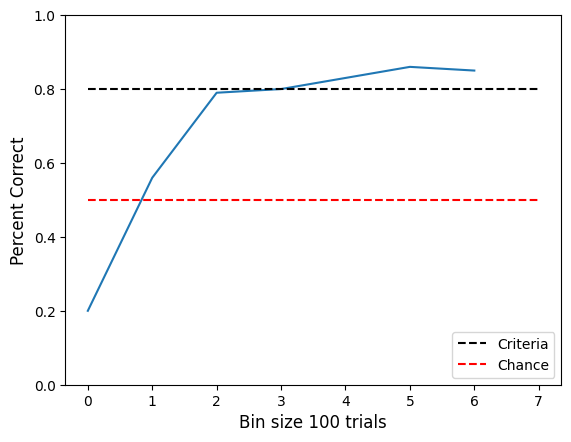

In [10]:
bin_size = 100
data = Responsedict.groupby(Responsedict.index//bin_size).correct.sum()
data = data.loc[::-1].reset_index(drop=True)
print(data)
nbins = len(data)
# data = data[:-1]
plt.plot(data/bin_size)
plt.ylim([0,1])
plt.hlines(.8,0,nbins,linestyle ='--',color = 'k',label = 'Criteria')
plt.hlines(.5,0,nbins,linestyle = '--', color = 'red', label = "Chance")
plt.legend(loc = 'lower right')
# analysisdf.plot(x =data[0], y=data[1], kind = 'line', color = 'black', marker = 'o')
plt.ylabel('Percent Correct', size = 12)
plt.xlabel(f'Bin size {bin_size} trials', size = 12)
# plt.axhline(y = 0.8, color = 'r', linestyle = '-')

{'bin': range(0, 7), 'N': [100, 100, 100, 100, 100, 100, 40], 'Correct': [53, 69, 78, 81, 88, 85, 35]}


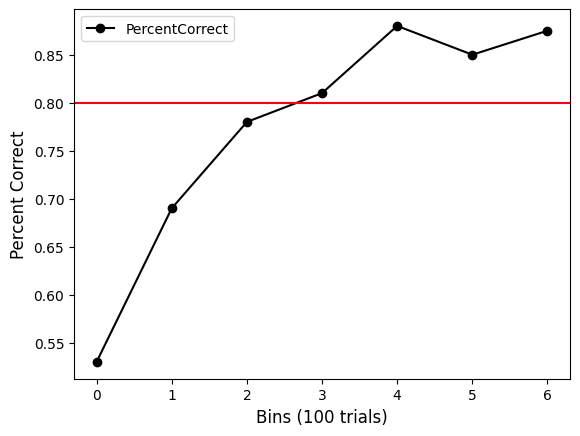

In [11]:
wonkybin = len(Responsedict)%100
num_bins = len(Responsedict)//100
count = []
numcorrect = []
wonkybinneddata = Responsedict.iloc[0:wonkybin]
trialcount = len(wonkybinneddata.SNR)
num = len(wonkybinneddata[wonkybinneddata.correct==True])
count.append(trialcount)
numcorrect.append(num)


for i in range(num_bins):
    binneddata = Responsedict.iloc[wonkybin+(i)*100:wonkybin+(i+1)*100]
    trialcount = len(binneddata.SNR)
    num = len(binneddata[binneddata.correct==True])
    count.append(trialcount)
    numcorrect.append(num)

count = count[::-1]
numcorrect = numcorrect[::-1]
analysis={'bin':range(num_bins+1),
      'N':count,
      'Correct':numcorrect,
      }

print (analysis)
analysisdf = pd.DataFrame(analysis)
analysisdf['PercentCorrect'] = analysisdf['Correct']/analysisdf['N']
analysisdf

analysisdf.plot(x ='bin', y='PercentCorrect', kind = 'line', color = 'black', marker = 'o')
plt.ylabel('Percent Correct', size = 12)
plt.xlabel('Bins (100 trials)', size = 12)
plt.axhline(y = 0.8, color = 'r', linestyle = '-')


In [12]:
###Create Dataframe that contains percent correct across SNR###
snrlist= sorted(set(Responsedict['SNR']),reverse=True)
motiflist = set(Responsedict['Motif'])
print (motiflist)
count = []
numcorrect = []
for i in snrlist:
    snrcolumn= Responsedict[Responsedict.SNR==i]
    trialcount = len(snrcolumn.SNR)
    num = len(snrcolumn[snrcolumn.correct==True])
    count.append(trialcount)
    numcorrect.append(num)
analysis={'SNR':snrlist,
          'N':count,
          'Correct':numcorrect}
analysisdf = pd.DataFrame(analysis)
analysisdf['PercentCorrect'] = analysisdf['Correct']/analysisdf['N']
analysisdf

{'9ex2k0dy', 'jkexyrd5', 'igmi8fxa', 'c95zqjxq'}


,SNR,N,Correct,PercentCorrect
0,70,640,489,0.764062


Text(0.5, 0, 'Signal-to-Noise (SNR) Ratio')

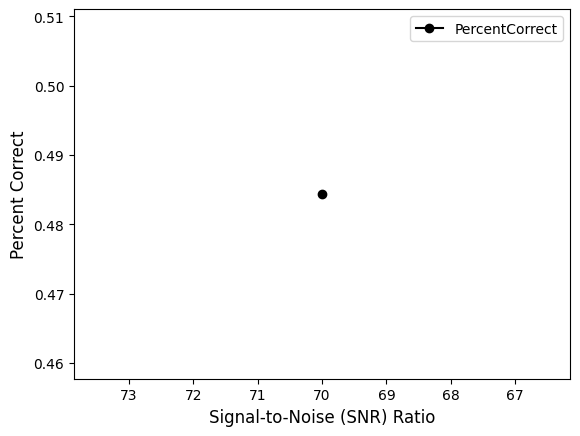

In [44]:
####Plot Percent Correct across SNR
analysisdf.plot(x ='SNR', y='PercentCorrect', kind = 'line', color = 'black', marker = 'o').invert_xaxis()
plt.ylabel('Percent Correct', size = 12)
plt.xlabel('Signal-to-Noise (SNR) Ratio', size = 12)
#plt.set_xlim(70,-10)

In [13]:
###Create Dataframe that contains percent correct across Motif for the last 100 trials###
snrset= sorted(set(NewResponsedict['SNR']),reverse=True)
motifset = set(NewResponsedict['Motif'])
snrlist = []
motiflist = []
count = []
numcorrect = []
for i in motifset:
    motifcolumn= NewResponsedict[NewResponsedict.Motif==i]
    for j in snrset:
        motiflist.append(i)
        snrlist.append(j)
        snrcolumn= motifcolumn[motifcolumn.SNR==j]
        trialcount = len(snrcolumn.SNR)
        num = len(snrcolumn[snrcolumn.correct==True])
        count.append(trialcount)
        numcorrect.append(num)
motifanalysis={'Motif':motiflist,'SNR':snrlist,'N':count,'Correct':numcorrect}
motifanalysisdf = pd.DataFrame(motifanalysis)
motifanalysisdf['PercentCorrect'] = motifanalysisdf['Correct']/motifanalysisdf['N']
motifanalysisdf
for i in motifset:
    print (motifanalysisdf[motifanalysisdf.Motif==i])

      Motif  SNR   N  Correct  PercentCorrect
0  9ex2k0dy   70  75       70        0.933333
      Motif  SNR   N  Correct  PercentCorrect
1  jkexyrd5   70  41       41             1.0
      Motif  SNR   N  Correct  PercentCorrect
2  igmi8fxa   70  40       30            0.75
      Motif  SNR   N  Correct  PercentCorrect
3  c95zqjxq   70  44       30        0.681818


In [14]:
###Create Dataframe that contains percent correct across Motif for all trials###
snrset= sorted(set(Responsedict['SNR']),reverse=True)
motifset = set(Responsedict['Motif'])
snrlist = []
motiflist = []
count = []
numcorrect = []
for i in motifset:
    motifcolumn= Responsedict[Responsedict.Motif==i]
    for j in snrset:
        motiflist.append(i)
        snrlist.append(j)
        snrcolumn= motifcolumn[motifcolumn.SNR==j]
        trialcount = len(snrcolumn.SNR)
        num = len(snrcolumn[snrcolumn.correct==True])
        count.append(trialcount)
        numcorrect.append(num)
motifanalysis={'Motif':motiflist,'SNR':snrlist,'N':count,'Correct':numcorrect}
motifanalysisdf = pd.DataFrame(motifanalysis)
motifanalysisdf['PercentCorrect'] = motifanalysisdf['Correct']/motifanalysisdf['N']
motifanalysisdf
for i in motifset:
    print (motifanalysisdf[motifanalysisdf.Motif==i])

      Motif  SNR    N  Correct  PercentCorrect
0  9ex2k0dy   70  245      224        0.914286
      Motif  SNR    N  Correct  PercentCorrect
1  jkexyrd5   70  181      177        0.977901
      Motif  SNR   N  Correct  PercentCorrect
2  igmi8fxa   70  86       46        0.534884
      Motif  SNR    N  Correct  PercentCorrect
3  c95zqjxq   70  128       42        0.328125


In [15]:
###Create Dataframe that contains number of timeouts across Motif###
snrset= sorted(set(timeoutdict['SNR']),reverse=True)
motifset = set(timeoutdict['Motif'])
snrlist = []
motiflist = []
count = []
for i in motifset:
    motifcolumn= timeoutdict[timeoutdict.Motif==i]
    for j in snrset:
        motiflist.append(i)
        snrlist.append(j)
        snrcolumn= motifcolumn[motifcolumn.SNR==j]
        trialcount = len(snrcolumn.SNR)
        num = len(snrcolumn[snrcolumn.correct==True])
        count.append(trialcount)
        numcorrect.append(num)
timeoutanalysis={'Motif':motiflist,'SNR':snrlist,'N_Timeout':count}
timeoutanalysisdf = pd.DataFrame(timeoutanalysis)
timeoutanalysisdf


,Motif,SNR,N_Timeout


In [508]:
full_analysis_df = motifanalysisdf.merge(timeoutanalysisdf)
for i in motifset:
    print (full_analysis_df[full_analysis_df.Motif==i])

Empty DataFrame
Columns: [Motif, SNR, N, Correct, PercentCorrect, N_Timeout]
Index: []
Empty DataFrame
Columns: [Motif, SNR, N, Correct, PercentCorrect, N_Timeout]
Index: []
Empty DataFrame
Columns: [Motif, SNR, N, Correct, PercentCorrect, N_Timeout]
Index: []
Empty DataFrame
Columns: [Motif, SNR, N, Correct, PercentCorrect, N_Timeout]
Index: []


In [16]:
###Create Dataframe that contains key choices across SNR###
snrlist= sorted(set(Responsedict['SNR']),reverse=True)
count = []
leftcount = []
rightcount = []
for i in snrlist:
    snrcolumn= Responsedict[Responsedict.SNR==i]
    trialcount = len(snrcolumn.SNR)
    count.append(trialcount)
    left = len(snrcolumn[snrcolumn.response=='peck_left'])
    leftcount.append(left)
    right = len(snrcolumn[snrcolumn.response=='peck_right'])
    rightcount.append(right)
analysis={'SNR':snrlist,
          'N':count,
          'Left':leftcount,
         'Right': rightcount}
analysisdf = pd.DataFrame(analysis)
analysisdf['PercentLeft'] = analysisdf['Left']/analysisdf['N']
analysisdf['PercentRight'] = analysisdf['Right']/analysisdf['N']
analysisdf

,SNR,N,Left,Right,PercentLeft,PercentRight
0,70,640,527,113,0.823438,0.176563


In [26]:
###Create Dataframe that contains key choices across SNR for the past 100 trials###
snrlist= sorted(set(NewResponsedict['SNR']),reverse=True)
count = []
leftcount = []
rightcount = []
for i in snrlist:
    snrcolumn= NewResponsedict[NewResponsedict.SNR==i]
    trialcount = len(snrcolumn.SNR)
    count.append(trialcount)
    left = len(snrcolumn[snrcolumn.response=='peck_left'])
    leftcount.append(left)
    right = len(snrcolumn[snrcolumn.response=='peck_right'])
    rightcount.append(right)
analysis={'SNR':snrlist,
          'N':count,
          'Left':leftcount,
         'Right': rightcount}
analysisdf = pd.DataFrame(analysis)
analysisdf['PercentLeft'] = analysisdf['Left']/analysisdf['N']
analysisdf['PercentRight'] = analysisdf['Right']/analysisdf['N']
analysisdf

,SNR,N,Left,Right,PercentLeft,PercentRight
0,70,100,65,35,0.65,0.35


In [59]:
###Separate stimulus out into foreground, foreground sound level, background, background sound level, and the SNR###
SNRdf = smalldf
motif = []
background = []
sdB = []
snl = []
SNR = []

def parse_stimuli (stimulus):
    stimulus_parser = parse.compile("{foreground}-{sdB:d}_{background}-{snl:d}")
    parse_result = stimulus_parser.parse(stimulus)
    singlemotif = parse_result.named['foreground']
    background = parse_result.named['background']
    sdB = parse_result.named['sdB']
    snl = parse_result.named['snl']
    SNR = snl - sdB
    return singlemotif, sdB, background, snl, SNR

for i in fulldf['stimulus']:
    info = list(parse_stimuli(i))
    motif.append(info[0])
    sdB.append(info[1])
    background.append(info[2])
    snl.append(info[3])
    SNR.append(info[4])
    
SNRdf['Motif'] = motif
SNRdf['sdB'] = sdB
SNRdf['Background'] = background
SNRdf['snl'] = snl
SNRdf['SNR'] = SNR

print (SNRdf.head())
print (SNRdf.shape)

ValueError: Length of values (5588) does not match length of index (4189)

In [ ]:
###Remove timeout trials###
Responsedf = SNRdf[SNRdf.response != 'timeout']

print (Responsedf.head())
print (Responsedf.shape)
####How often the bird timed out###
percentage_of_response = (len(Responsedf))/(len(SNRdf))
percentage_of_response

In [151]:
###Create Dataframe that contains percent correct across Motif###
snrset= sorted(set(Responsedf['SNR']),reverse=True)
motifset = set(Responsedf['Motif'])
snrlist = []
motiflist = []
count = []
numcorrect = []
for i in motifset:
    motifcolumn= Responsedf[Responsedf.Motif==i]
    for j in snrset:
        motiflist.append(i)
        snrlist.append(j)
        snrcolumn= motifcolumn[motifcolumn.SNR==j]
        trialcount = len(snrcolumn.SNR)
        num = len(snrcolumn[snrcolumn.correct==True])
        count.append(trialcount)
        numcorrect.append(num)
motifanalysis={'Motif':motiflist,'SNR':snrlist,'N':count,'Correct':numcorrect}
motifanalysisdf = pd.DataFrame(motifanalysis)
motifanalysisdf['PercentCorrect'] = motifanalysisdf['Correct']/motifanalysisdf['N']
motifanalysisdf
for i in motifset:
    print (motifanalysisdf[motifanalysisdf.Motif==i])

NameError: name 'Responsedf' is not defined

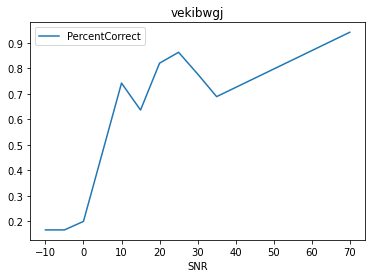

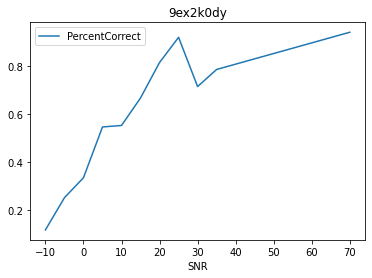

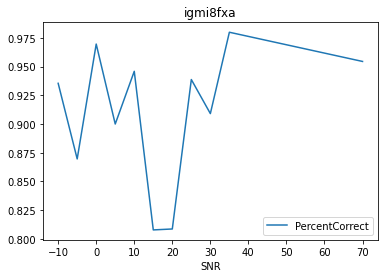

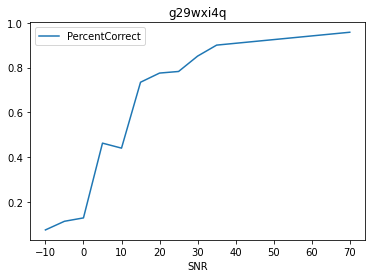

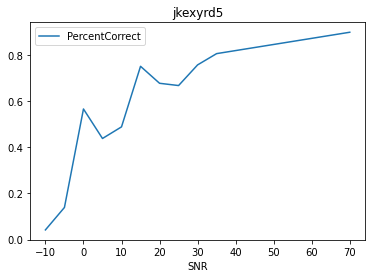

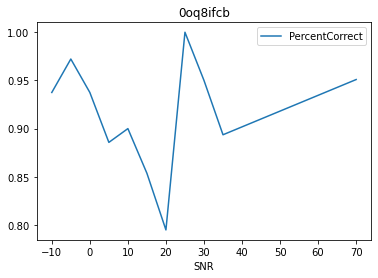

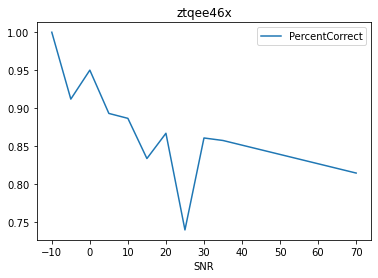

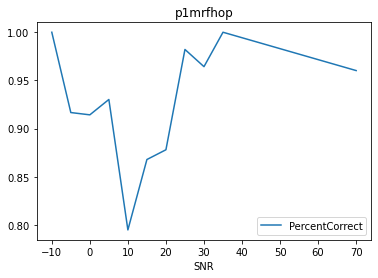

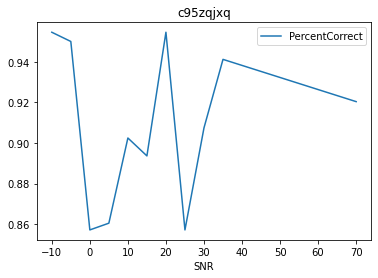

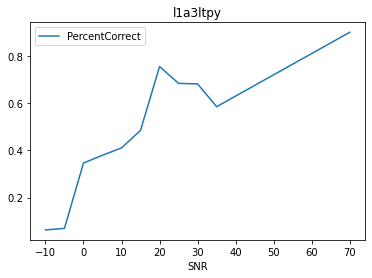

In [11]:
for i in motifset:
    motifanalysisdf[motifanalysisdf.Motif==i].plot(x ='SNR', y='PercentCorrect', kind = 'line')
    plt.title(i)

In [ ]:
###ATTIC###
###Create Dataframe that contains percent correct across SNR###
motiflist = set(Responsedf['Motif'])
print (motiflist)
count = []
numcorrect = []
bins = np.arange(0,100001,100)
print (bins)
# for i in iterrows:
#     snrcolumn= Responsedf[Responsedf.SNR==i]
#     trialcount = len(snrcolumn.SNR)
#     num = len(snrcolumn[snrcolumn.correct==True])
#     count.append(trialcount)
#     numcorrect.append(num)
# analysis={'SNR':snrlist,
#           'N':count,
#           'Correct':numcorrect}
# analysisdf = pd.DataFrame(analysis)
# analysisdf['PercentCorrect'] = analysisdf['Correct']/analysisdf['N']
# analysisdf

In [813]:
# # ###Read in all probe data###
# fulldf = pd.read_csv ('C269.csv')
# mask = fulldf['experiment'].str.contains('2ac-probe')
# C269probe = fulldf[mask]
# C269probe

,addr,name,subject,time,rtime,trial,result,correct,response,stimulus,correction,experiment
0,beagle-4,gng,C269,2023-05-04T13:32:10.448652-04:00,199012.0,1801,feed,True,peck_left,9ex2k0dy-30_btwmt59w4-100,0,2ac-probe-snr70_35_-10-set1-invertedNo
1,beagle-4,gng,C269,2023-05-04T13:31:58.533906-04:00,708003.0,1800,feed,True,peck_right,c95zqjxq-30_btwmt59w1-100,0,2ac-probe-snr70_35_-10-set1-invertedNo
2,beagle-4,gng,C269,2023-05-04T13:31:31.422282-04:00,765205.0,1799,none,False,peck_right,9ex2k0dy-30_btwmt59w5-20,0,2ac-probe-snr70_35_-10-set1-invertedNo
3,beagle-4,gng,C269,2023-05-04T13:31:18.538282-04:00,427481.0,1798,feed,True,peck_right,igmi8fxa-30_btwmt59w1-100,0,2ac-probe-snr70_35_-10-set1-invertedNo
4,beagle-4,gng,C269,2023-05-04T13:30:41.324391-04:00,NaN,1797,punish,False,timeout,c95zqjxq-30_btwmt59w4-20,0,2ac-probe-snr70_35_-10-set1-invertedNo
...,...,...,...,...,...,...,...,...,...,...,...,...
17147,beagle-4,gng,C269,2023-02-10T06:26:06.986828-05:00,NaN,5,punish,False,timeout,c95zqjxq-30_btwmt59w1-65,0,2ac-probe-snr70_35-set1-invertedNo
17148,beagle-4,gng,C269,2023-02-10T06:07:49.562443-05:00,NaN,4,punish,False,timeout,jkexyrd5-30_btwmt59w2-100,0,2ac-probe-snr70_35-set1-invertedNo
17149,beagle-4,gng,C269,2023-02-10T06:07:10.093207-05:00,NaN,3,punish,False,timeout,c95zqjxq-30_btwmt59w5-100,0,2ac-probe-snr70_35-set1-invertedNo
17150,beagle-4,gng,C269,2023-02-10T06:06:27.242303-05:00,NaN,2,punish,False,timeout,9ex2k0dy-30_btwmt59w1-100,0,2ac-probe-snr70_35-set1-invertedNo
